<a href="https://colab.research.google.com/github/nguepigit2020/Data-Analyst-project/blob/main/Projet_Data_Analyst_Carlyna_Npower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Etape 1 – Chargement & Nettoyage

In [3]:
!ls Data/

olist_customers_dataset.csv	  olist_orders_dataset.csv
olist_geolocation_dataset.csv	  olist_products_dataset.csv
olist_order_items_dataset.csv	  olist_sellers_dataset.csv
olist_order_payments_dataset.csv  product_category_name_translation.csv
olist_order_reviews_dataset.csv


In [4]:
#### Load all data as pa

df_olist_customers = pd.read_csv("Data/olist_customers_dataset.csv",sep=',')
df_olist_geolocation = pd.read_csv("Data/olist_geolocation_dataset.csv",sep=',')
df_olist_order_items = pd.read_csv("Data/olist_order_items_dataset.csv",sep=',')
df_olist_order_payments = pd.read_csv("Data/olist_order_payments_dataset.csv",sep=',')
df_olist_order_reviews = pd.read_csv("Data/olist_order_reviews_dataset.csv",sep=',')
df_olist_orders = pd.read_csv("Data/olist_orders_dataset.csv",sep=',')
df_olist_products = pd.read_csv("Data/olist_products_dataset.csv",sep=',')
df_olist_sellers = pd.read_csv("Data/olist_sellers_dataset.csv",sep=',')
df_product_category_name_translation = pd.read_csv("Data/product_category_name_translation.csv",sep=',')

In [5]:
### display informations of each dataframe
df_olist_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
### display informations of the dataframe
df_olist_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [7]:
df_olist_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [8]:
df_olist_order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [9]:
df_olist_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [10]:
df_olist_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
df_olist_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
df_olist_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


df_product_category_name_translation.info()

## Vérifie s’il existe des doublons dans chaque fichier. Si oui, supprime-les

In [13]:
listAllDf =[df_olist_customers,
df_olist_geolocation,
df_olist_order_items,
df_olist_order_payments ,
df_olist_order_reviews,
df_olist_orders ,
df_olist_products ,
df_olist_sellers,
df_product_category_name_translation]

In [19]:
### Vérifie les doublons dans tous les champs
duplicate = df_olist_geolocation.duplicated().sum()
print("Duplicate number: {}".format(duplicate))

Duplicate number: 261831


In [20]:
def checkAllDuplicate(listDf):

    dupl_number = 0

    for df in listDf:
        dupl_number = len(df[df.duplicated()])
        print("Le nombre de dupliqué pour {} est de {}".format(0, dupl_number))

## Test the code
checkAllDuplicate(listAllDf)

Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 261831
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0


In [21]:
def dropDuplicates(listDf):
    for i in range(len(listDf)):
        listDf[i] = listDf[i].drop_duplicates()
    return listDf

## Test the code
listAllDf2 = dropDuplicates(listAllDf)

In [22]:
checkAllDuplicate(listAllDf2)

Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0
Le nombre de dupliqué pour 0 est de 0


In [23]:
listAllDf2[0].shape

(99441, 5)

In [26]:
nbr = listAllDf2[5]["order_delivered_customer_date"].isnull().sum()
print(f"Number of null value: {nbr}")

Number of null value: 2965


In [27]:
listAllDf2[5] = listAllDf2[5].dropna()

In [28]:
## Check if it's correct
nbr_clean = listAllDf2[5]["order_delivered_customer_date"].isnull().sum()
print(nbr_clean)

0


## Valeurs manquantes dans les colonnes clés (dates, montants, identifiants)

In [29]:
def checheckMissingValues(listDf, key_columns):
    for idx, df in enumerate(listDf):
        print(f"\n--- Vérification du DataFrame {idx} ---")
        for col in key_columns:
            if col in df.columns:
                missing = df[col].isnull().sum()
                print(f"Colonne '{col}': {missing} valeur(s) manquante(s)")
            else:
                print(f"Colonne '{col}' absente du DataFrame")

## Test
key_columns = ["customer_id","order_id","seller_id","review_creation_date","payment_value","order_delivered_customer_date"]
checheckMissingValues(listAllDf2, key_columns)


--- Vérification du DataFrame 0 ---
Colonne 'customer_id': 0 valeur(s) manquante(s)
Colonne 'order_id' absente du DataFrame
Colonne 'seller_id' absente du DataFrame
Colonne 'review_creation_date' absente du DataFrame
Colonne 'payment_value' absente du DataFrame
Colonne 'order_delivered_customer_date' absente du DataFrame

--- Vérification du DataFrame 1 ---
Colonne 'customer_id' absente du DataFrame
Colonne 'order_id' absente du DataFrame
Colonne 'seller_id' absente du DataFrame
Colonne 'review_creation_date' absente du DataFrame
Colonne 'payment_value' absente du DataFrame
Colonne 'order_delivered_customer_date' absente du DataFrame

--- Vérification du DataFrame 2 ---
Colonne 'customer_id' absente du DataFrame
Colonne 'order_id': 0 valeur(s) manquante(s)
Colonne 'seller_id': 0 valeur(s) manquante(s)
Colonne 'review_creation_date' absente du DataFrame
Colonne 'payment_value' absente du DataFrame
Colonne 'order_delivered_customer_date' absente du DataFrame

--- Vérification du DataFra

## Etape 2 – Transformation des données

In [30]:
## Calcule la durée de livraison pour chaque commande

df = listAllDf2[5]
# Conversion des colonnes en datetime (si ce n'est pas déjà fait)
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# # Calcul de la durée de livraison
df['delivery_duration'] = df['order_delivered_customer_date'] - df['order_purchase_timestamp']

# # En jours (facultatif)
df['delivery_duration_days'] = df['delivery_duration'].dt.days
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_duration_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8 days 10:28:40,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13 days 18:46:08,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9 days 09:27:40,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13 days 05:00:36,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2 days 20:58:23,2


In [37]:
## Calcule l’écart entre la date estimée et la date réelle de livraison.
df = listAllDf2[5]
df["on_time_delivery"] = pd.to_datetime(df['order_estimated_delivery_date'])>= pd.to_datetime(df['order_delivered_customer_date'])
percentage = df["on_time_delivery"].sum() /len(df["on_time_delivery"])
print(f"Proportion: {percentage:.2f} %")

Proportion: 0.92 %


In [38]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_duration_days,on_time_delivery
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,8 days 10:28:40,8,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,13 days 18:46:08,13,True
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,9 days 09:27:40,9,True
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,13 days 05:00:36,13,True
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2 days 20:58:23,2,True


In [39]:
df['on_time_delivery'] = df['on_time_delivery'].map({True: 'oui', False: 'non'})

In [40]:
# Regrouper les paiements par commande (somme)
total_paid_per_order = df_olist_order_payments.groupby('order_id')['payment_value'].sum().reset_index()
total_paid_per_order.rename(columns={'payment_value': 'total_paid'}, inplace=True)
total_paid_per_order.head()

,order_id,total_paid
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04


In [41]:
# Regrouper les frais de port par commande (somme), puis moyenne
freight_per_order = df_olist_order_items.groupby('order_id')['freight_value'].sum().reset_index()
freight_per_order.rename(columns={'freight_value': 'total_freight'}, inplace=True)

# Calcul du frais de port moyen
freight_mean = freight_per_order['total_freight'].mean()
print(f"Frais de port moyen par commande : {freight_mean:.2f}")


Frais de port moyen par commande : 22.82


In [53]:
# En cas de multiples reviews pour une commande : on prend la moyenne ou la plus récente
review_score = df_olist_order_reviews.groupby('order_id')['review_score'].mean().reset_index().round()
review_score.head()

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0
1,00018f77f2f0320c557190d7a144bdd3,4.0
2,000229ec398224ef6ca0657da4fc703e,5.0
3,00024acbcdf0a6daa1e931b038114c75,4.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0


## Etape 3 – Fusion et enrichissement

In [63]:
# Garder les colonnes utiles
orders_df = listAllDf2[5]

orders_selected = orders_df[['order_id', 'customer_id', 'order_purchase_timestamp',
                             'delivery_duration', 'order_estimated_delivery_date',
                             'order_delivered_customer_date', "delivery_duration_days",'on_time_delivery']]

# Fusion
final_df = orders_selected.merge(total_paid_per_order, on='order_id', how='left')
final_df = final_df.merge(review_score, on='order_id', how='left')


In [64]:
final_df.head()

,order_id,customer_id,order_purchase_timestamp,delivery_duration,order_estimated_delivery_date,order_delivered_customer_date,delivery_duration_days,on_time_delivery,total_paid,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8 days 10:28:40,2017-10-18 00:00:00,2017-10-10 21:25:13,8,oui,38.71,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,13 days 18:46:08,2018-08-13 00:00:00,2018-08-07 15:27:45,13,oui,141.46,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9 days 09:27:40,2018-09-04 00:00:00,2018-08-17 18:06:29,9,oui,179.12,5.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,13 days 05:00:36,2017-12-15 00:00:00,2017-12-02 00:28:42,13,oui,72.20,5.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2 days 20:58:23,2018-02-26 00:00:00,2018-02-16 18:17:02,2,oui,28.62,5.0


In [65]:
final_df['estimated_vs_real'] = (pd.to_datetime(final_df['order_estimated_delivery_date']) - pd.to_datetime(final_df['order_delivered_customer_date'])).dt.days


In [66]:
final_df = final_df.merge(
    df_olist_customers[['customer_id', 'customer_zip_code_prefix']],
    on='customer_id',
    how='left'
)


In [67]:
final_df.head()

,order_id,customer_id,order_purchase_timestamp,delivery_duration,order_estimated_delivery_date,order_delivered_customer_date,delivery_duration_days,on_time_delivery,total_paid,review_score,estimated_vs_real,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8 days 10:28:40,2017-10-18 00:00:00,2017-10-10 21:25:13,8,oui,38.71,4.0,7,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,13 days 18:46:08,2018-08-13 00:00:00,2018-08-07 15:27:45,13,oui,141.46,4.0,5,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9 days 09:27:40,2018-09-04 00:00:00,2018-08-17 18:06:29,9,oui,179.12,5.0,17,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,13 days 05:00:36,2017-12-15 00:00:00,2017-12-02 00:28:42,13,oui,72.20,5.0,12,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,2 days 20:58:23,2018-02-26 00:00:00,2018-02-16 18:17:02,2,oui,28.62,5.0,9,9195


In [68]:
final_df.describe()

,order_purchase_timestamp,delivery_duration,order_delivered_customer_date,delivery_duration_days,total_paid,review_score,estimated_vs_real,customer_zip_code_prefix
count,96461,96461,96461,96461.000000,96460.000000,95815.000000,96461.000000,96461.000000
mean,2018-01-01 23:53:26.642249216,12 days 13:23:46.585853350,2018-01-14 13:17:13.228102400,12.093582,159.855721,4.155706,10.875577,35198.925825
min,2016-09-15 12:16:38,0 days 12:48:07,2016-10-11 13:46:32,0.000000,9.590000,1.000000,-189.000000,1003.000000
25%,2017-09-14 09:28:28,6 days 18:22:50,2017-09-25 22:31:59,6.000000,61.880000,4.000000,6.000000,11355.000000
50%,2018-01-20 19:59:42,10 days 05:11:29,2018-02-02 19:50:56,10.000000,105.280000,5.000000,11.000000,24436.000000
75%,2018-05-05 18:33:24,15 days 17:17:10,2018-05-15 23:08:54,15.000000,176.330000,5.000000,16.000000,59056.000000
max,2018-08-29 15:00:37,209 days 15:05:12,2018-10-17 13:22:46,209.000000,13664.080000,5.000000,146.000000,99980.000000
std,NaN,9 days 13:06:45.121880865,NaN,9.551576,218.828474,1.283893,10.183476,29839.654761


##  Etape 4 – Analyse exploratoire

![Screenshot%202025-06-19%20at%2021.03.41.png](attachment:Screenshot%202025-06-19%20at%2021.03.41.png)

### 10.Quelle est la répartition des scores de satisfaction (1 à 5)

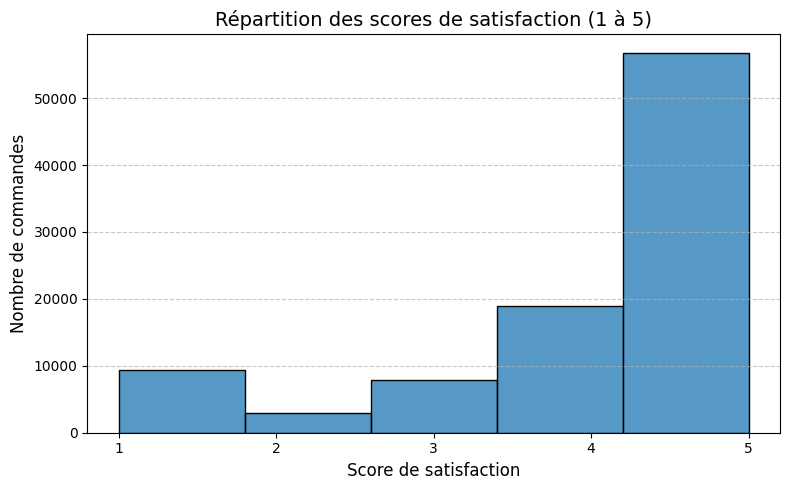

In [69]:
plt.figure(figsize=(8, 5))  # Taille du graphique

sns.histplot(final_df["review_score"], bins=5, kde=False, edgecolor="black")

plt.title("Répartition des scores de satisfaction (1 à 5)", fontsize=14)
plt.xlabel("Score de satisfaction", fontsize=12)
plt.ylabel("Nombre de commandes", fontsize=12)


plt.xticks(ticks=[1, 2, 3, 4, 5], fontsize=10)


plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 11.Le délai de livraison a-t-il un impact sur la satisfaction ?

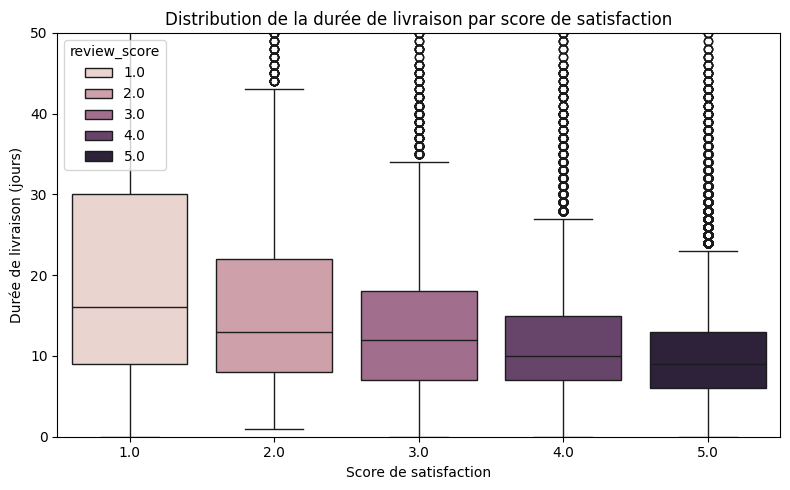

In [70]:
# Ajouter la colonne de durée en jours
final_df["duree_livraison_jours"] = listAllDf[5]["delivery_duration_days"]

# Affichage boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=final_df, x="review_score", y="delivery_duration_days", hue="review_score")
plt.ylim(0, 50)
plt.title("Distribution de la durée de livraison par score de satisfaction")
plt.xlabel("Score de satisfaction")
plt.ylabel("Durée de livraison (jours)")
plt.tight_layout()
plt.show()

### 12.Quel est le montant moyen des commandes selon le score de satisfaction ?

In [71]:
final_df.groupby("review_score")["total_paid"].mean().round(2)

,total_paid
review_score,
1.0,193.46
2.0,170.07
3.0,151.11
4.0,154.56
5.0,156.35


### 13.Quelles sont les 5 villes avec le plus de commandes livrées en retard ?

In [72]:
# liste des (zip,city)
df_city=listAllDf[1][["geolocation_zip_code_prefix", "geolocation_city"]].drop_duplicates()
df_city.tail()

,geolocation_zip_code_prefix,geolocation_city
999806,99940,ibiaçá
999846,99952,santa cecilia do sul
999867,99970,ciríaco
999891,99930,estação
1000046,99955,vila lângaro


In [73]:
#recupération des noms des villes
final_df=final_df.merge(df_city, left_on="customer_zip_code_prefix", right_on="geolocation_zip_code_prefix", how="left")

final_df.head()

,order_id,customer_id,order_purchase_timestamp,delivery_duration,order_estimated_delivery_date,order_delivered_customer_date,delivery_duration_days,on_time_delivery,total_paid,review_score,estimated_vs_real,customer_zip_code_prefix,duree_livraison_jours,geolocation_zip_code_prefix,geolocation_city
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8 days 10:28:40,2017-10-18 00:00:00,2017-10-10 21:25:13,8,oui,38.71,4.0,7,3149,8.0,3149.0,sao paulo
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,8 days 10:28:40,2017-10-18 00:00:00,2017-10-10 21:25:13,8,oui,38.71,4.0,7,3149,8.0,3149.0,são paulo
2,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,13 days 18:46:08,2018-08-13 00:00:00,2018-08-07 15:27:45,13,oui,141.46,4.0,5,47813,13.0,47813.0,barreiras
3,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9 days 09:27:40,2018-09-04 00:00:00,2018-08-17 18:06:29,9,oui,179.12,5.0,17,75265,9.0,75265.0,vianopolis
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,9 days 09:27:40,2018-09-04 00:00:00,2018-08-17 18:06:29,9,oui,179.12,5.0,17,75265,9.0,75265.0,vianópolis


In [74]:
#filter les 5 villes avec plus de cmd en retard
df_retard = final_df.dropna(subset=["on_time_delivery"])
df_retard = df_retard[df_retard["on_time_delivery"] == 'non']
dh=df_retard.groupby("geolocation_city").size().sort_values(ascending=False).head(5).reset_index(name="nbr")
dh

,geolocation_city,nbr
0,sao paulo,944
1,são paulo,931
2,rio de janeiro,788
3,salvador,207
4,belo horizonte,168


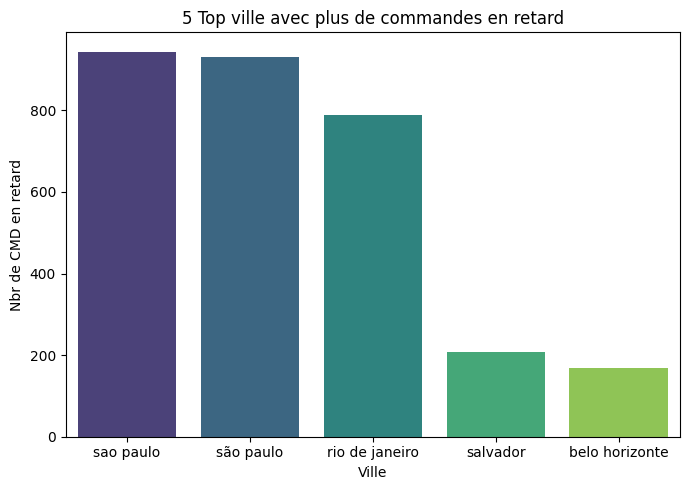

In [75]:
#representation graphique des 5 villes avec plus de CMD en retard

# Barplot horizontal
plt.figure(figsize=(7, 5))
sns.barplot(
    data=dh,
    x="geolocation_city",
    y="nbr",
    palette="viridis",hue="geolocation_city",
    orient="v"
)
plt.xlabel("Ville")
plt.ylabel("Nbr de CMD en retard")
plt.title("5 Top ville avec plus de commandes en retard")
plt.tight_layout()
plt.show()

### 14.Quels sont les produits qui génèrent le plus de retards ?

In [76]:
#liste des categorie des produit commandés
dt1=listAllDf[6][["product_id","product_category_name"]].dropna()
dt2=listAllDf[2][["order_id","product_id"]].dropna()

df_product=dt2.merge(dt1,how="left",on="product_id").dropna()
df_product.head()

,order_id,product_id,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumaria
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,ferramentas_jardim


In [77]:
#liste des commandes en retard

dh=df_retard.merge(df_product,how="inner",on="order_id").groupby(["product_category_name"]).size().sort_values(ascending=False).head(10).reset_index(name="nbr")
dh

,product_category_name,nbr
0,beleza_saude,1324
1,cama_mesa_banho,1308
2,moveis_decoracao,1007
3,esporte_lazer,939
4,informatica_acessorios,867
5,relogios_presentes,706
6,utilidades_domesticas,680
7,telefonia,528
8,automotivo,496
9,ferramentas_jardim,488


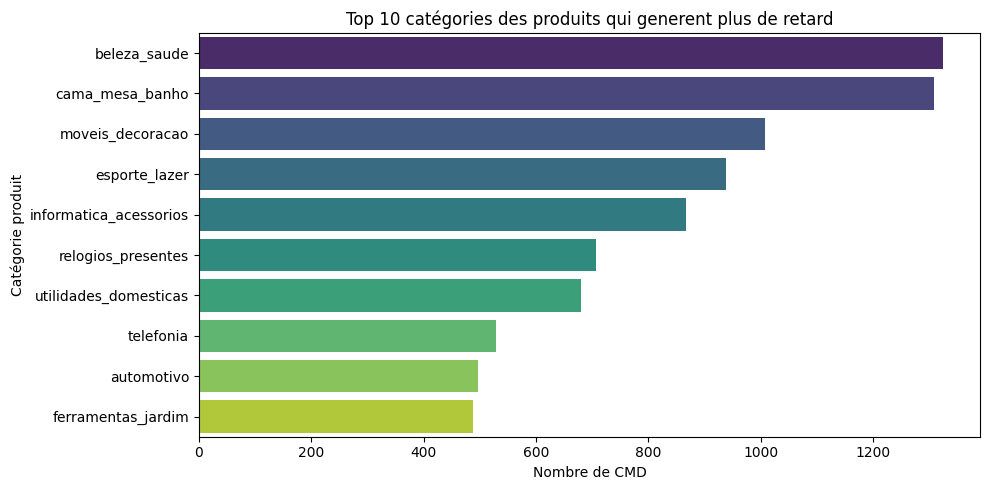

In [78]:
# representation graphique
# Barplot horizontal
plt.figure(figsize=(10, 5))
sns.barplot(
    data=dh,
    y="product_category_name",
    x="nbr",
    palette="viridis",hue="product_category_name",
)
plt.xlabel("Nombre de CMD")
plt.ylabel("Catégorie produit")
plt.title("Top 10 catégories des produits qui generent plus de retard")
plt.tight_layout()
plt.show()

### 15.Quel est le nombre moyen de jours de retard par catégorie de produit (product_category_name) ?

In [79]:
dh=df_retard.merge(df_product,how="inner",on="order_id").groupby(["product_category_name"])["duree_livraison_jours"].mean().round()
dh.head(10)

,duree_livraison_jours
product_category_name,
agro_industria_e_comercio,9.0
alimentos,11.0
alimentos_bebidas,12.0
artes,20.0
artes_e_artesanato,6.0
artigos_de_festas,5.0
artigos_de_natal,13.0
audio,13.0
automotivo,12.0


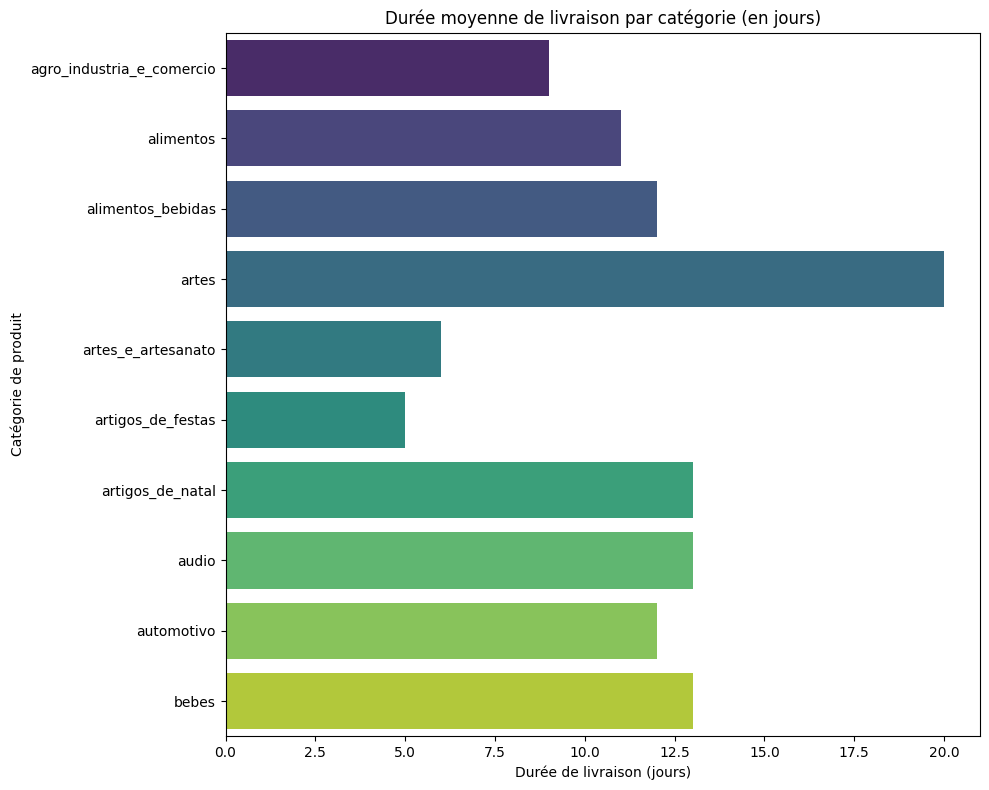

In [80]:
df = dh.head(10).reset_index()

# Barplot horizontal
plt.figure(figsize=(10, 8))
sns.barplot(
    data=df,
    x="duree_livraison_jours",
    y="product_category_name",
    palette="viridis",hue="product_category_name"
)
plt.xlabel("Durée de livraison (jours)")
plt.ylabel("Catégorie de produit")
plt.title("Durée moyenne de livraison par catégorie (en jours)")
plt.tight_layout()
plt.show()